<a href="https://colab.research.google.com/github/TommasoStrada/Progetto-Data-Science-Lab/blob/main/Prophet/Prophet_Casual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### Importa librerie

In [ ]:
#@title
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
py.init_notebook_mode()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

## Valori di MAPE e MAE:
##**Annuale =  36.88282213129677; 2828165.6058925684**
##**Trimestrale =  63.673431277460054; 416211.08446066873**
##**Mensile = 33.88366086887233; 88015.40211932464**
##**Settimanale =  57.516020242126785; 27166.085416936698**

## Annuale Pesca

In [ ]:
pesca = pd.read_csv ('casual_annuale.csv')
pesca = pesca[pesca['year']<2022]
pesca.head(2)

Unnamed: 0  year     revenue
0           0  2014  1959710.58
1           1  2015  4202764.36

**Dividiamo in test e train set** 

In [ ]:
steps = 2

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0    ds           y
6           6  2020  8190939.82
7           7  2021  7506147.47

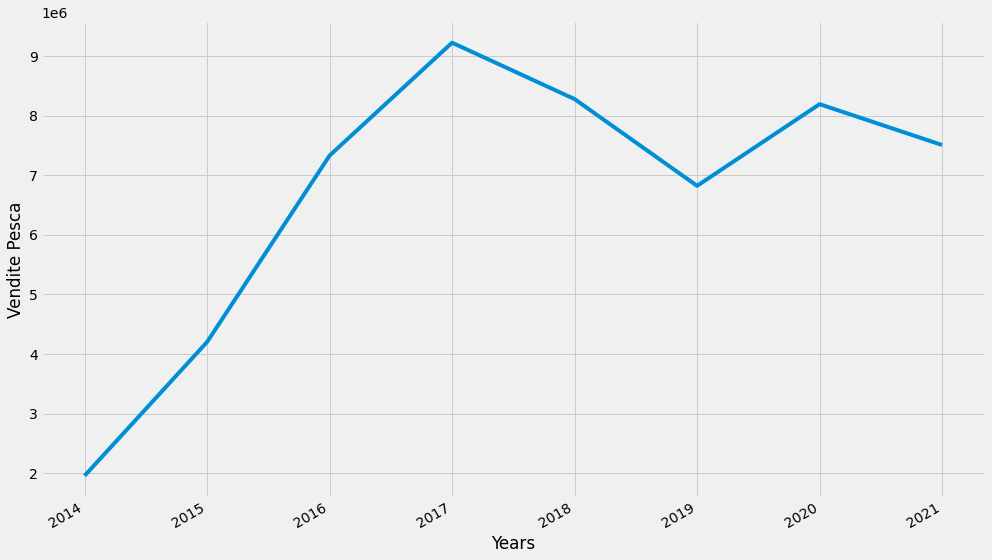

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['year'], pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

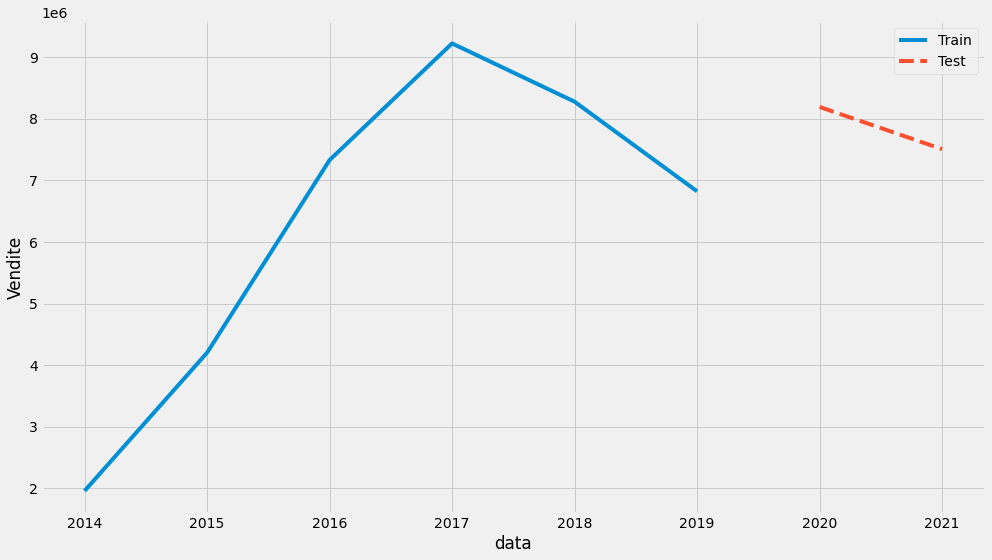

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [ ]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=10, changepoint_prior_scale=0.08)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


In [ ]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2020-01-01  8.981731e+06  6.683409e+06  1.268544e+07  8.981731e+06   
1 2021-01-01  1.007045e+07  8.453851e+06  1.491509e+07  1.007045e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  8.981731e+06    6.370556e+05          6.370556e+05          6.370556e+05   
1  1.007045e+07    1.664186e+06          1.664186e+06          1.664186e+06   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  6.370556e+05  6.370556e+05  6.370556e+05                   0.0   
1  1.664186e+06  1.664186e+06  1.664186e+06                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  9.618786e+06  
1                         0.0                         0.0  1.173463e+07

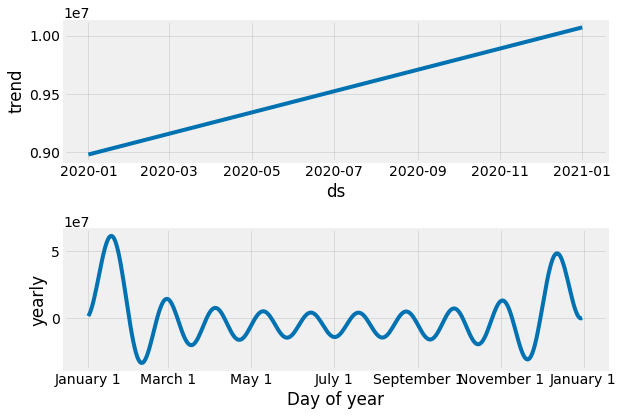

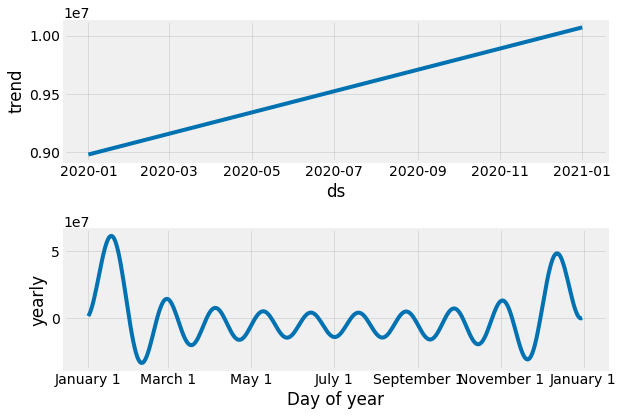

In [ ]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 36.88282213129677**
**MAE = 2828165.6058925684**

In [ ]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 36.88282213129677
MAE: 2828165.6058925684


##Trimestrale

In [ ]:
pesca = pd.read_csv('casual_trimestrale.csv', parse_dates=['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year    revenue
30          30 2021-09-30  543018.66
31          31 2021-12-31  664677.44

**Dividiamo in test e train set** 

In [ ]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) 
pesca_test

Unnamed: 0         ds          y
26          26 2020-09-30  674152.55
27          27 2020-12-31  789520.75
28          28 2021-03-31  985770.75
29          29 2021-06-30  709238.48
30          30 2021-09-30  543018.66
31          31 2021-12-31  664677.44

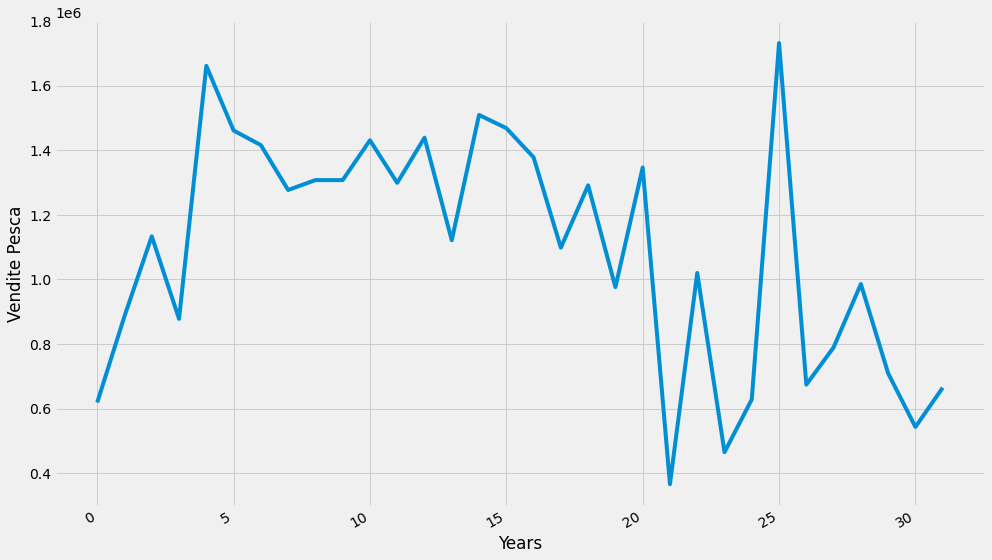

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

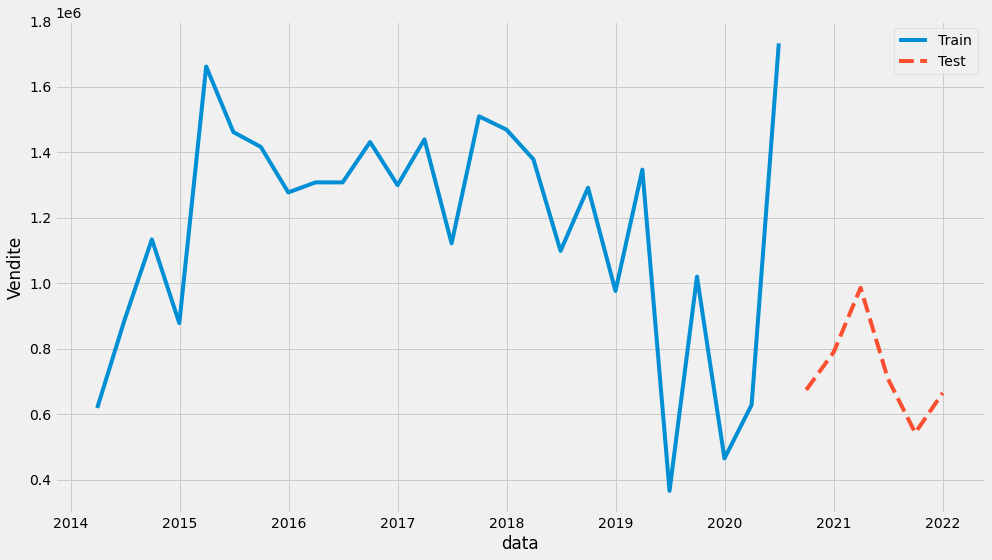

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

##n_changepoints=4, weekly_seasonality=True,changepoint_prior_scale=01 Prevediamo le vendite

In [ ]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=15, changepoint_prior_scale=0.02)
my_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend     yhat_lower    yhat_upper    trend_lower  \
0 2020-09-30  155661.761999  684607.773842  1.506670e+06  155661.760970   
1 2020-12-31  146676.896435  636349.780614  1.490759e+06  146676.893497   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  155661.762852    943660.44410          943660.44410          943660.44410   
1  146676.898935    938171.83701          938171.83701          938171.83701   

        monthly  monthly_lower  monthly_upper        yearly  yearly_lower  \
0 -2.578448e+06  -2.578448e+06  -2.578448e+06  3.522109e+06  3.522109e+06   
1 -2.620246e+06  -2.620246e+06  -2.620246e+06  3.558418e+06  3.558418e+06   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  3.522109e+06                   0.0                         0.0   
1  3.558418e+06                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  1.099322e+06  
1                         0.0  1.084849e+06

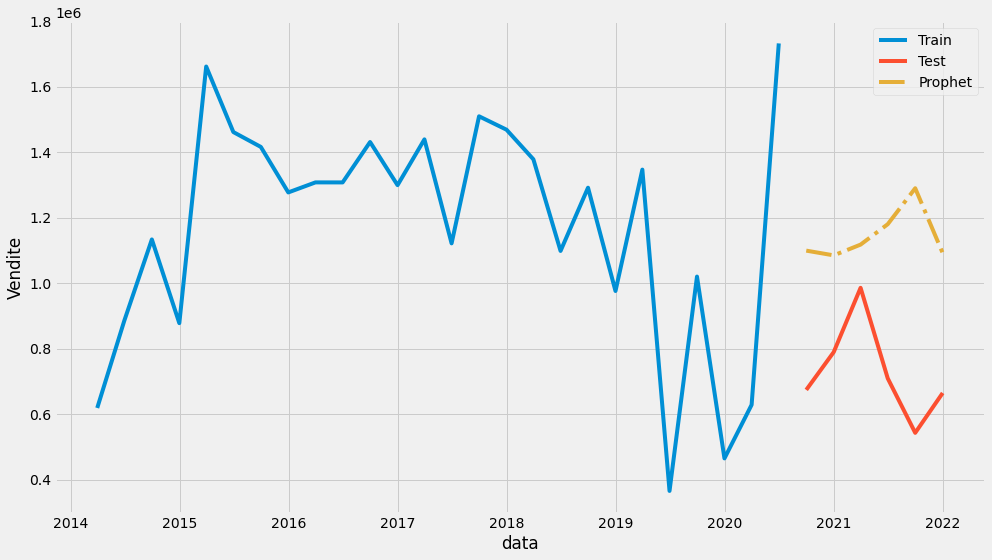

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

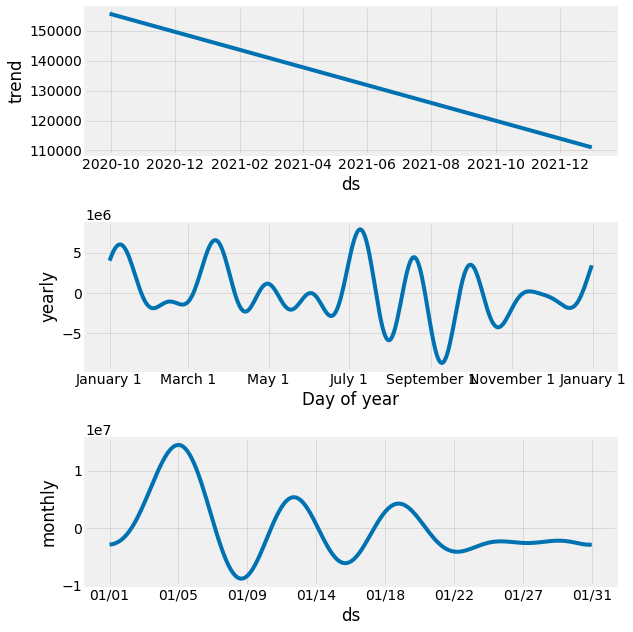

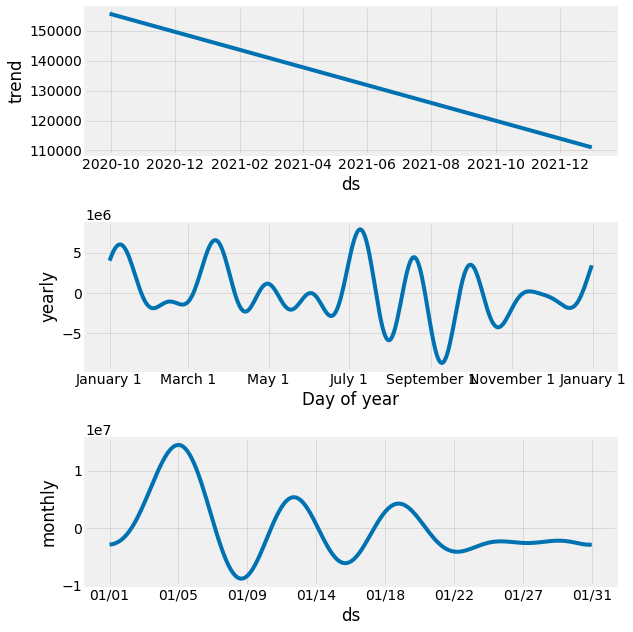

In [ ]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 63.673431277460054**
**MAE = 416211.08446066873**

In [ ]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 63.673431277460054
MAE: 416211.08446066873


##Mensile

In [ ]:
pesca = pd.read_csv('casual_mensile.csv').rename(columns={'Datetime':'year', 'totale':'revenue'})
pesca['year'] = pd.to_datetime(pesca['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year    revenue
94          94 2021-11-30  249497.74
95          95 2021-12-31  215405.71

**Dividiamo in test e train set** 

In [ ]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0         ds          y
77          77 2020-06-30  509121.69
78          78 2020-07-31  186785.32
79          79 2020-08-31  259979.55
80          80 2020-09-30  227387.68
81          81 2020-10-31  232932.72
82          82 2020-11-30  281042.27
83          83 2020-12-31  275545.76
84          84 2021-01-31  527328.22
85          85 2021-02-28  215185.48
86          86 2021-03-31  243257.05
87          87 2021-04-30  171086.47
88          88 2021-05-31  364878.76
89          89 2021-06-30  173273.25
90          90 2021-07-31  230836.03
91          91 2021-08-31  146709.43
92          92 2021-09-30  165473.20
93          93 2021-10-31  199773.99
94          94 2021-11-30  249497.74
95          95 2021-12-31  215405.71

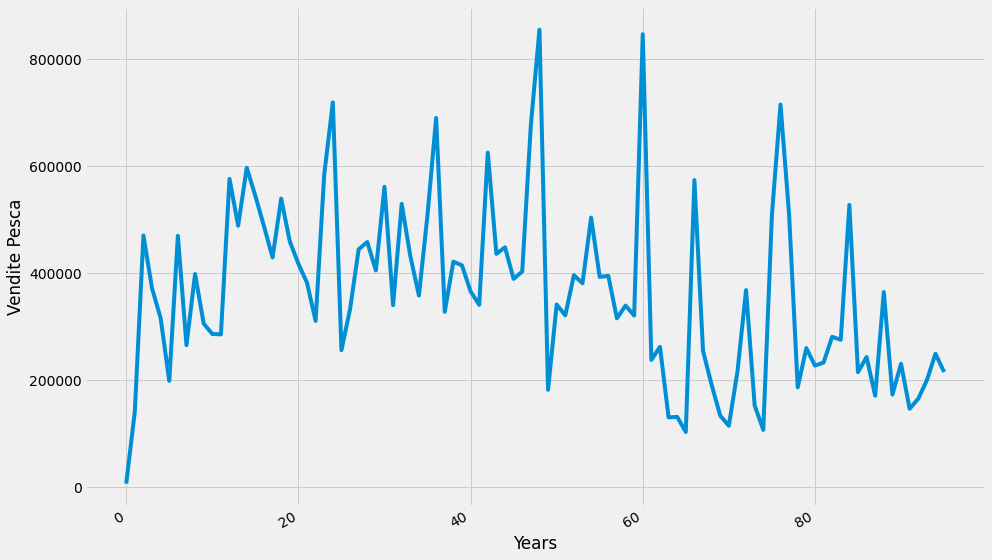

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

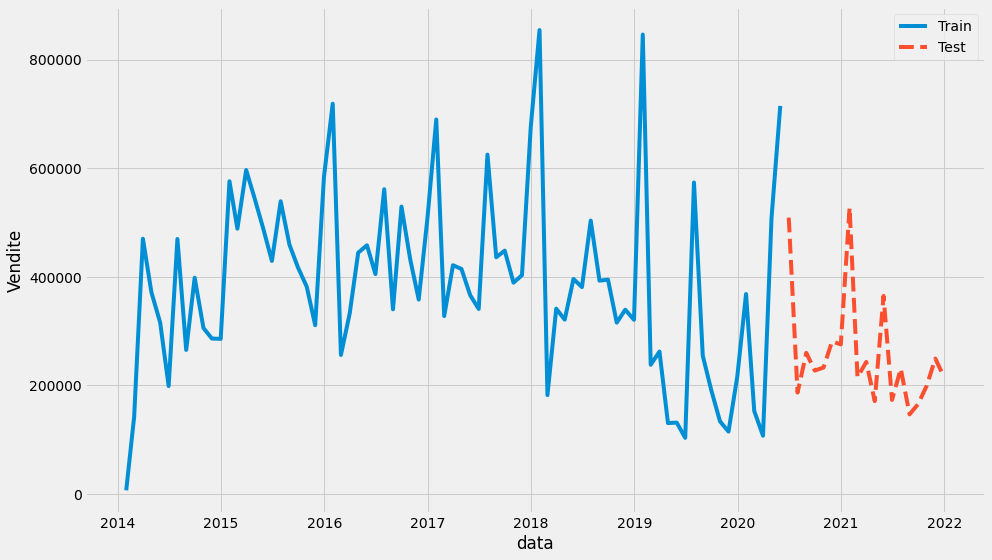

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [ ]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4, weekly_seasonality=True,changepoint_prior_scale=0.1)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend    yhat_lower     yhat_upper    trend_lower  \
0 2020-06-30  295836.671330 -16600.908044  402942.754445  295771.542135   
1 2020-07-31  292045.099525  37442.664032  473411.545314  290749.465708   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  295917.831903   -95702.547370         -95702.547370         -95702.547370   
1  292855.929084   -31002.544418         -31002.544418         -31002.544418   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0  -6852.772061  -6852.772061  -6852.772061 -88849.775309 -88849.775309   
1 -81056.725684 -81056.725684 -81056.725684  50054.181266  50054.181266   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -88849.775309                   0.0                         0.0   
1  50054.181266                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0  200134.123960  
1                         0.0  261042.555106

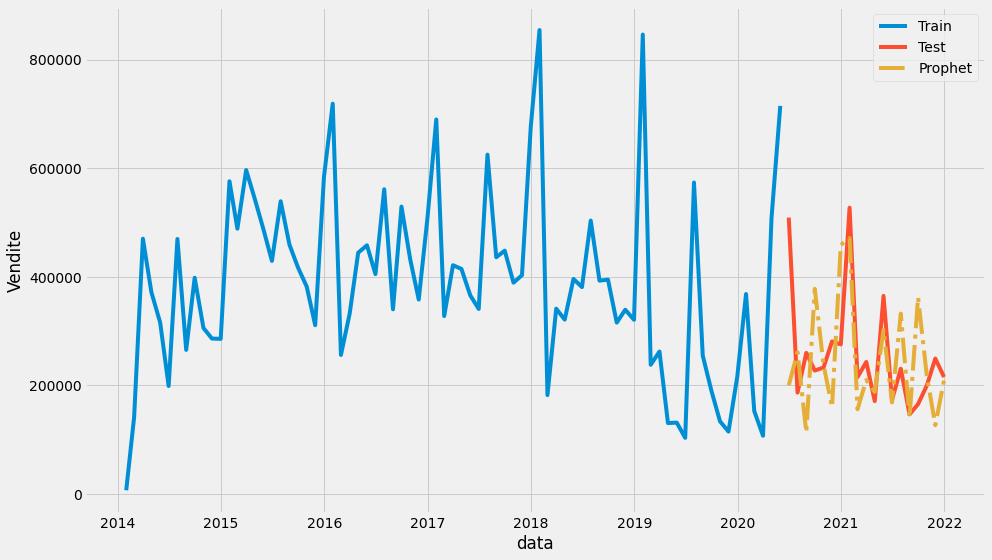

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

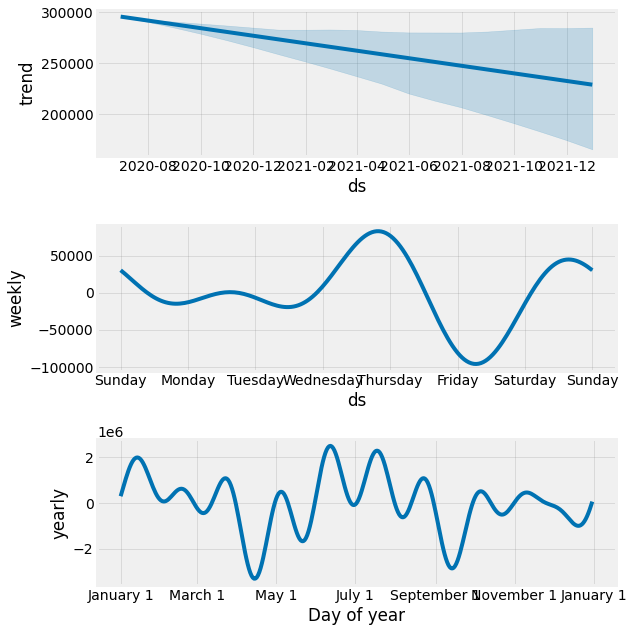

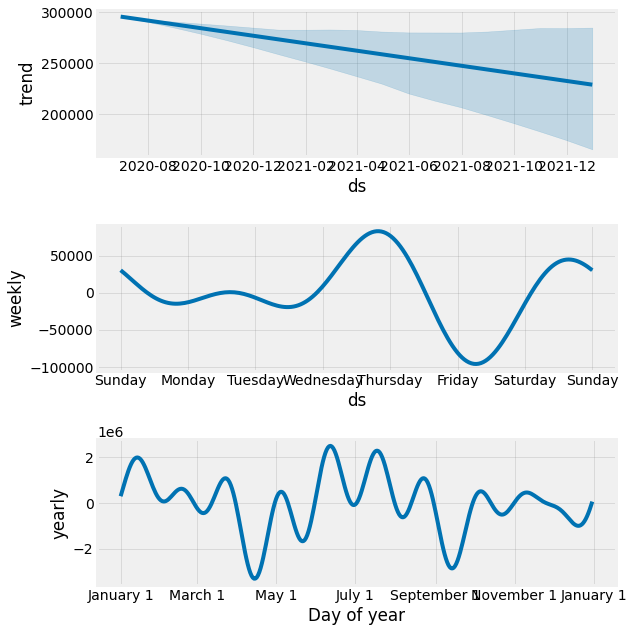

In [ ]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 33.88366086887233**
**MAE = 88015.40211932464**

In [ ]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 33.88366086887233
MAE: 88015.40211932464


##Settimanale

In [ ]:
pesca = pd.read_csv ('casual_settimanale.csv', parse_dates=['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year   revenue
415         415 2021-12-19  64517.93
416         416 2021-12-26   8168.99

**Dividiamo in test e train set** 

In [ ]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) 
pesca_test

Unnamed: 0         ds          y
334         334 2020-05-31  116597.62
335         335 2020-06-07  126904.24
336         336 2020-06-14  175230.72
337         337 2020-06-21  129054.13
338         338 2020-06-28   70592.41
..          ...        ...        ...
412         412 2021-11-28  139666.95
413         413 2021-12-05   46987.92
414         414 2021-12-12   77640.87
415         415 2021-12-19   64517.93
416         416 2021-12-26    8168.99

[83 rows x 3 columns]

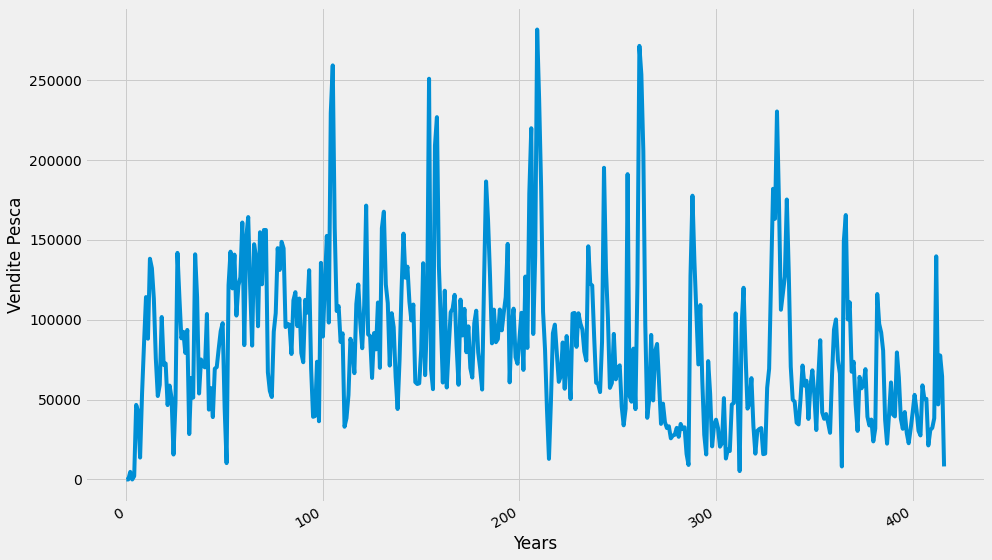

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

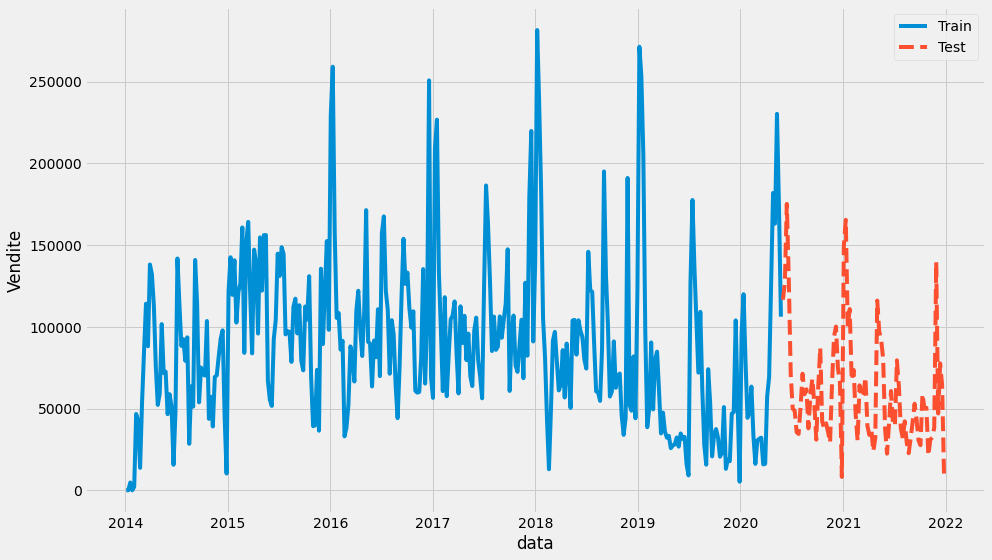

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [ ]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=7, daily_seasonality=True,changepoint_prior_scale=0.12)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0 2020-05-31  13495.853022 -36895.266167  119060.949525  13495.853022   
1 2020-06-07  13205.549761 -47688.750575  105004.576606  13205.549761   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  13495.853022    31393.505681          31393.505681          31393.505681   
1  13205.549761    19113.520948          19113.520948          19113.520948   

         daily  daily_lower  daily_upper        yearly  yearly_lower  \
0  46313.35393  46313.35393  46313.35393 -14919.848249 -14919.848249   
1  46313.35393  46313.35393  46313.35393 -27199.832982 -27199.832982   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -14919.848249                   0.0                         0.0   
1 -27199.832982                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  44889.358703  
1                         0.0  32319.070709

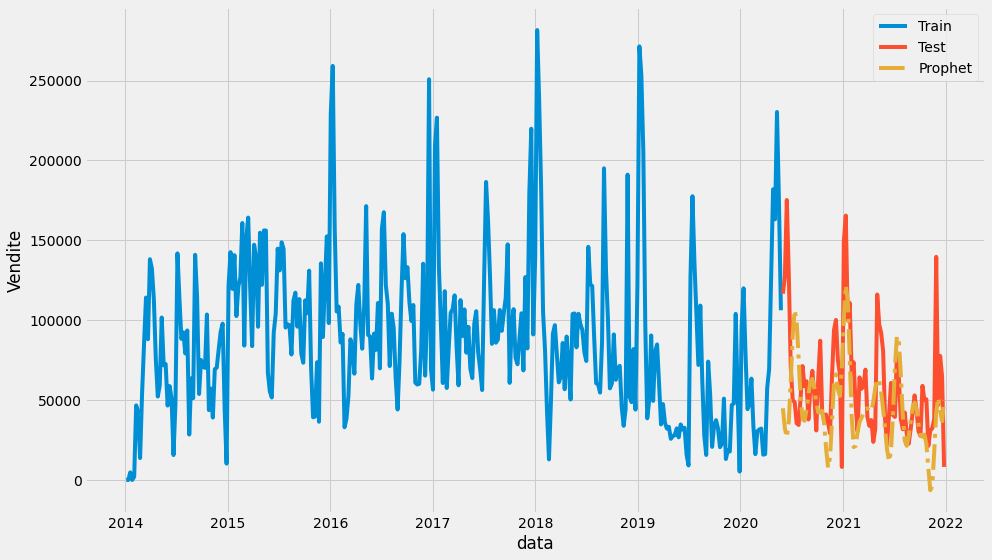

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

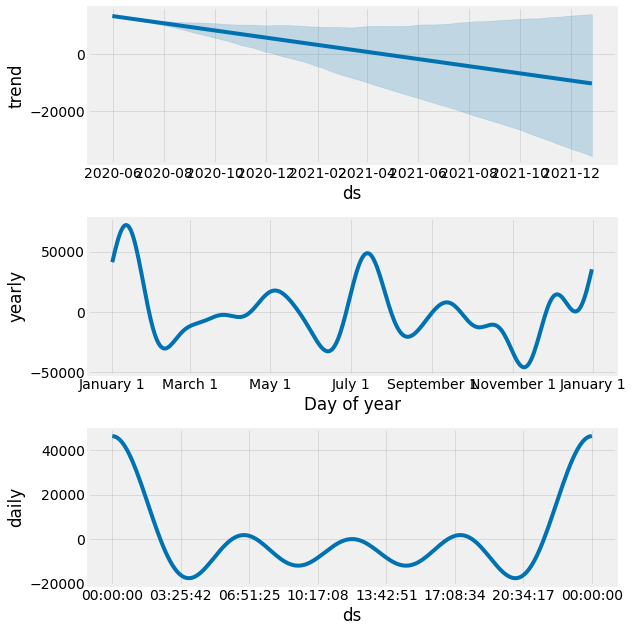

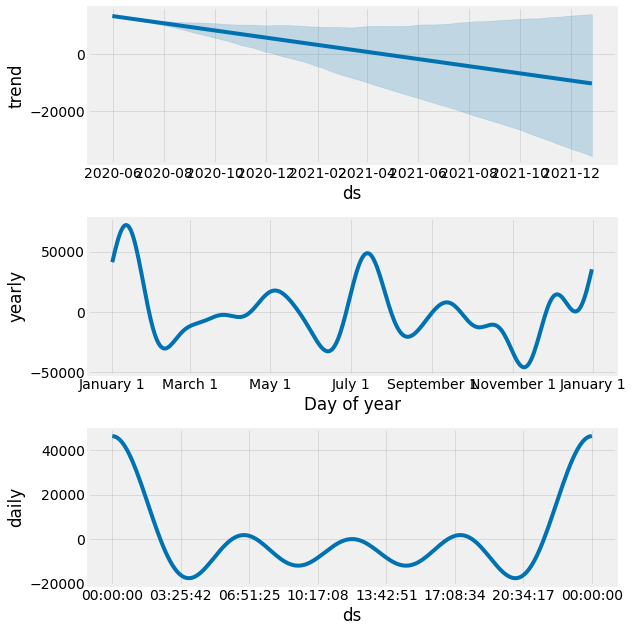

In [ ]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 57.516020242126785**
**MAE = 27166.085416936698**

In [ ]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 57.516020242126785
MAE: 27166.085416936698
